<a href="https://colab.research.google.com/github/Saidevaki/website_traffic_forecasting/blob/main/websitetraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


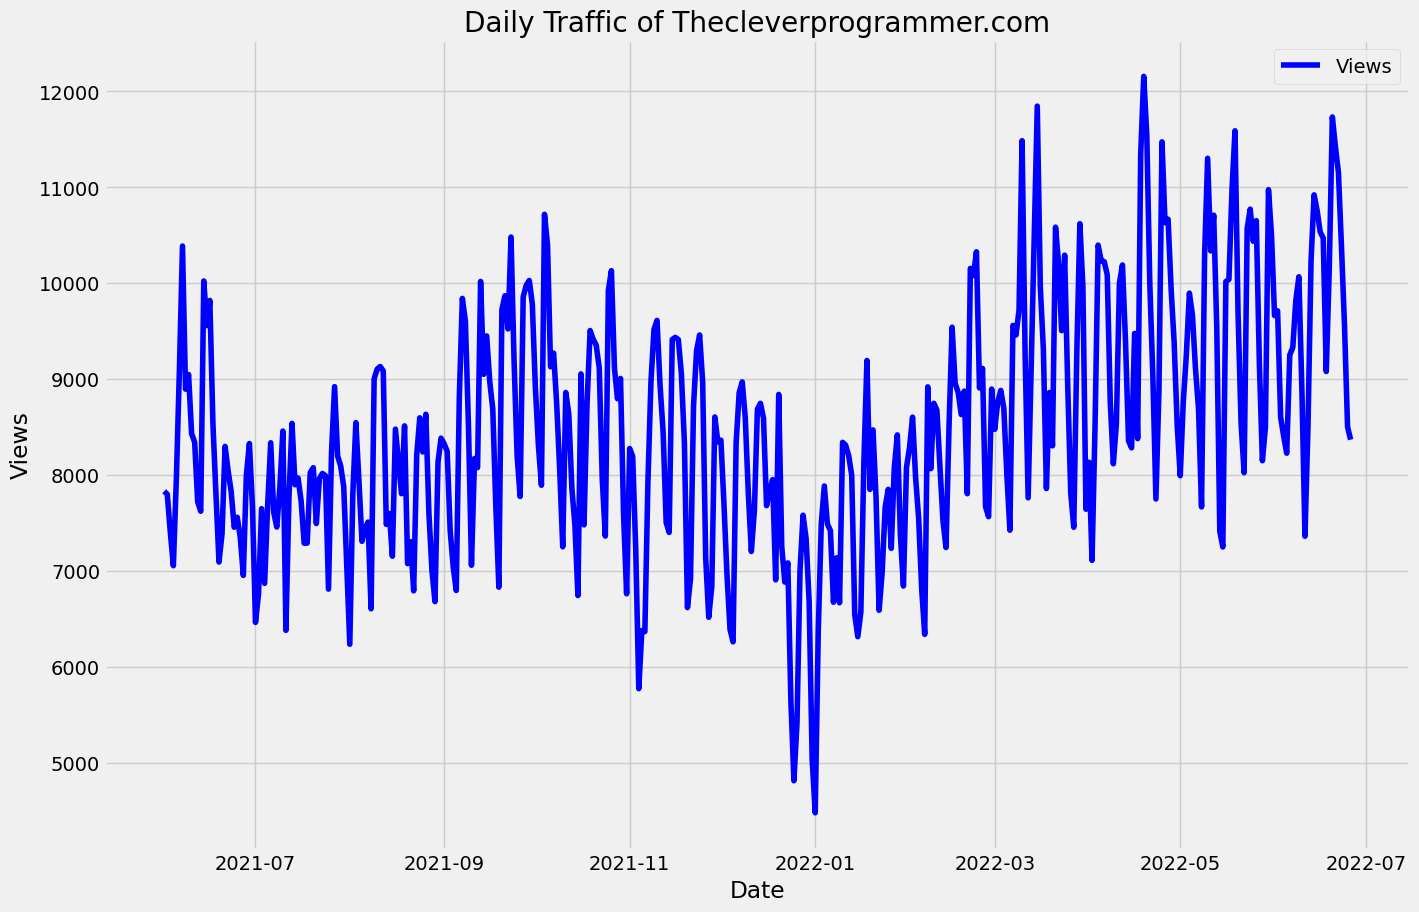

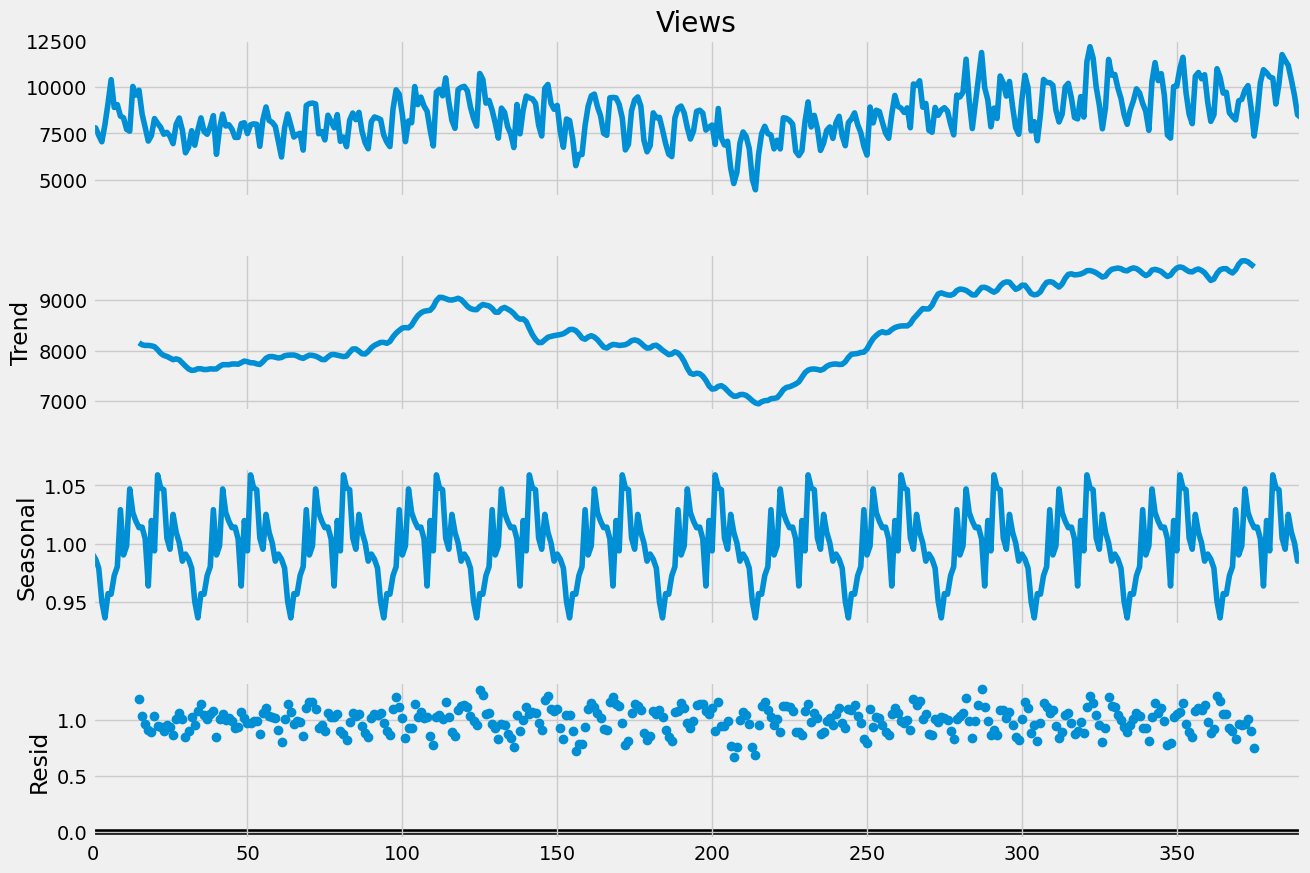

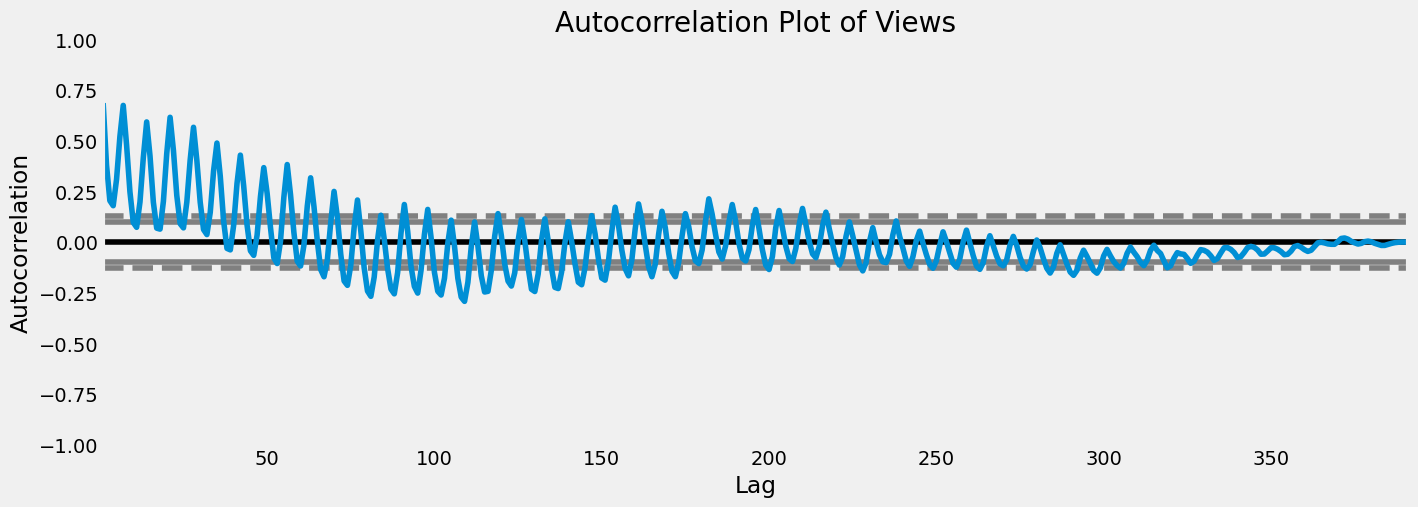

<Figure size 1500x500 with 0 Axes>

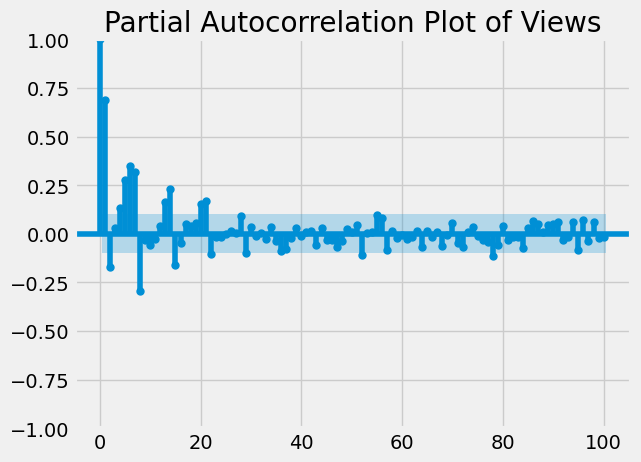

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.936
Date:                            Tue, 20 Aug 2024   AIC                           6227.873
Time:                                    17:36:41   BIC                           6286.896
Sample:                                         0   HQIC                          6251.298
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7687      0.129      5.953      0.000       0.516       1.022
ar.L2         -0.8007      0.135   

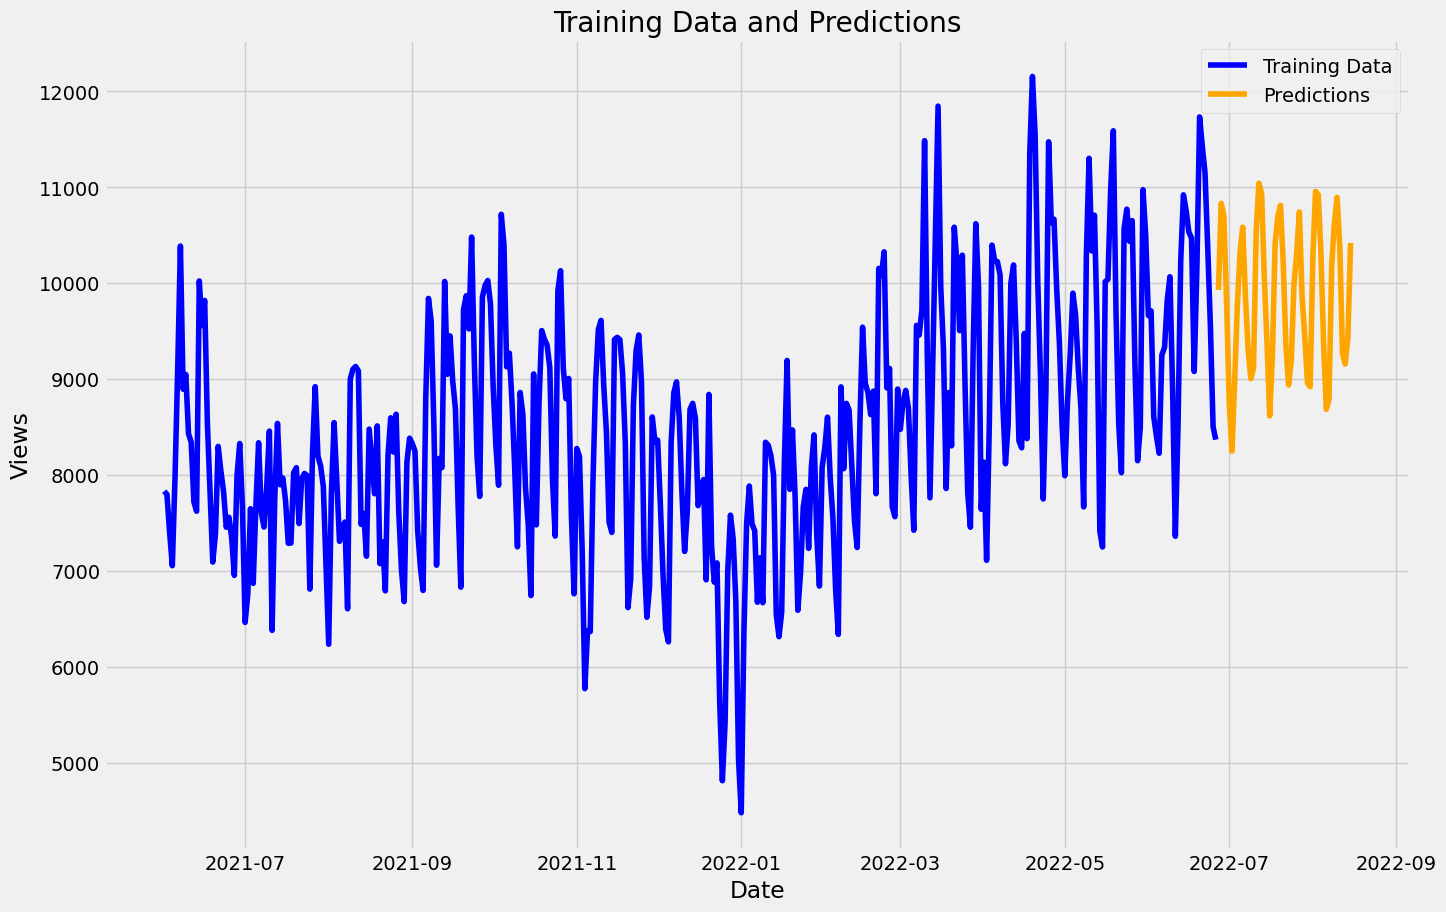

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("Thecleverprogrammer.csv")

# Display the first few rows of the dataset
print(data.head())

# Convert 'Date' column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")

# Display information about the dataset
print(data.info())

# Plotting the time series data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"], label="Views", color='blue')
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()

# Seasonal decomposition of the time series
result = seasonal_decompose(data["Views"], model='multiplicative', period=30)
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()

# Plotting autocorrelation and partial autocorrelation
plt.figure(figsize=(15, 5))
pd.plotting.autocorrelation_plot(data["Views"])
plt.title("Autocorrelation Plot of Views")
plt.show()

plt.figure(figsize=(15, 5))
plot_pacf(data["Views"], lags=100, method='ywm')
plt.title("Partial Autocorrelation Plot of Views")
plt.show()

# Setting the SARIMA model parameters
p, d, q = 5, 1, 2

# Fitting the SARIMA model
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model_fit = model.fit()

# Printing the model summary
print(model_fit.summary())

# Making predictions for the next 50 days
future_steps = 50
predictions = model_fit.get_forecast(steps=future_steps)
predicted_mean = predictions.predicted_mean

# Creating a date range for the predictions
predicted_dates = pd.date_range(start=data["Date"].iloc[-1] + pd.Timedelta(days=1), periods=future_steps)

# Plotting the training data and predictions
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"], label="Training Data", color='blue')
plt.plot(predicted_dates, predicted_mean, label="Predictions", color='orange')
plt.title("Training Data and Predictions")
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.show()





